In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score


In [84]:
# Load the data from the account attributes file
account_attributes = pd.read_excel('account_attributes.xlsx')

In [85]:

# Load the data from the account usage file
account_usage = pd.read_excel('account_usage.xlsx')

In [86]:
# Check for missing values in both datasets
print(account_attributes.isnull().sum())
print(account_usage.isnull().sum())



Acct id                       0
Acct type                     0
Activate chat bot             0
Converted to paid customer    0
dtype: int64
Acct id                  0
Date time                0
Number of link clicks    0
dtype: int64


In [87]:
# Check for duplicates in both datasets
print(account_attributes.duplicated().sum())
print(account_usage.duplicated().sum())


0
0


In [88]:
# Convert 'Date time' to datetime and sort the usage data
account_usage['Date time'] = pd.to_datetime(account_usage['Date time'])
account_usage.sort_values(by=['Acct id', 'Date time'], inplace=True)

In [89]:
 #Calculate the conversion rate
conversion_rate = (account_attributes['Converted to paid customer'].sum() / len(account_attributes)) * 100
print(f"Conversion rate: {conversion_rate:.2f}%")


Conversion rate: 31.62%


In [90]:
# Analyze the impact of chatbot activation on conversion rates
conversion_by_chatbot = account_attributes.groupby('Activate chat bot')['Converted to paid customer'].mean() * 100
print(conversion_by_chatbot)


Activate chat bot
N    20.105088
Y    41.126825
Name: Converted to paid customer, dtype: float64


In [91]:
# Merge the datasets on 'Acct id'
combined_data = pd.merge(account_attributes, account_usage, on='Acct id')

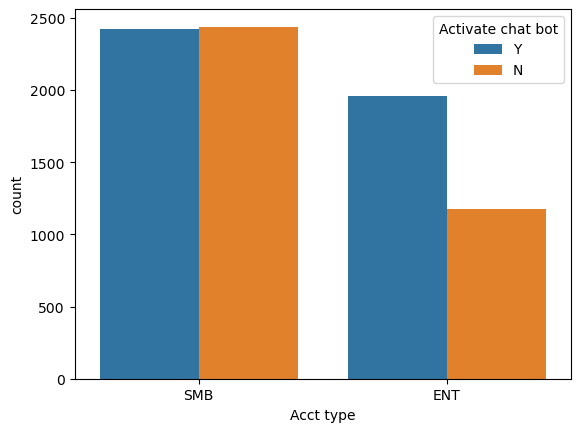

In [92]:
# Analyze the distribution of account types and chatbot activation
sns.countplot(x='Acct type', hue='Activate chat bot', data=account_attributes)
plt.show()

In [93]:
# Analyze the conversion rates
conversion_rates = account_attributes['Converted to paid customer'].value_counts(normalize=True)
print(conversion_rates)


Converted to paid customer
0    0.68375
1    0.31625
Name: proportion, dtype: float64


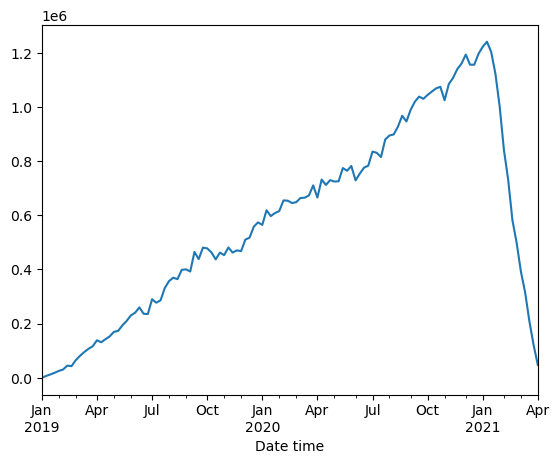

In [94]:
# Analyze usage patterns over time
# Plot the total number of clicks over time
total_clicks_over_time = account_usage.groupby('Date time')['Number of link clicks'].sum()
total_clicks_over_time.plot()
plt.show()


In [102]:

# Aggregate usage data to get total clicks per account
total_clicks = account_usage.groupby('Acct id')['Number of link clicks'].sum().reset_index()
total_clicks.rename(columns={'Number of link clicks': 'Total clicks'}, inplace=True)

# Merge the datasets on 'Acct id'
data = pd.merge(account_attributes, total_clicks, on='Acct id', how='left')

# One-hot encode categorical data for modeling
data = pd.get_dummies(data, columns=['Acct type', 'Activate chat bot'])

# Prepare the data for modeling
X = data.drop(['Acct id', 'Converted to paid customer'], axis=1)
y = data['Converted to paid customer'].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the logistic regression model
print(classification_report(y_test, y_pred_logistic))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_logistic))

# Feature importance can be derived from the coefficients of the logistic regression model
importance = logistic_model.coef_[0]
features = X.columns
for i, v in enumerate(importance):
    print(f'Feature: {features[i]}, Score: {v:.5f}')


              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1085
           1       0.69      0.53      0.60       515

    accuracy                           0.77      1600
   macro avg       0.75      0.71      0.72      1600
weighted avg       0.77      0.77      0.76      1600

ROC AUC Score: 0.7107690931054539
Feature: Total clicks, Score: 0.00001
Feature: Acct type_ENT, Score: 0.52774
Feature: Acct type_SMB, Score: -0.97819
Feature: Activate chat bot_N, Score: -0.61636
Feature: Activate chat bot_Y, Score: 0.16591


In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

def load_data(account_attributes_path, account_usage_path):
    # Load the data from the account attributes and usage files
    account_attributes = pd.read_excel(account_attributes_path)
    account_usage = pd.read_excel(account_usage_path)
    return account_attributes, account_usage

def preprocess_data(account_attributes, account_usage):
    # Check for missing values and duplicates
    print(account_attributes.isnull().sum())
    print(account_usage.isnull().sum())
    print(account_attributes.duplicated().sum())
    print(account_usage.duplicated().sum())

    # Convert 'Date time' to datetime and sort the usage data
    account_usage['Date time'] = pd.to_datetime(account_usage['Date time'])
    account_usage.sort_values(by=['Acct id', 'Date time'], inplace=True)

    return account_attributes, account_usage

def calculate_conversion_rate(account_attributes):
    # Calculate the conversion rate
    conversion_rate = (account_attributes['Converted to paid customer'].sum() / len(account_attributes)) * 100
    print(f"Conversion rate: {conversion_rate:.2f}%")

def analyze_data(account_attributes, account_usage):
    # Analyze the impact of chatbot activation on conversion rates
    conversion_by_chatbot = account_attributes.groupby('Activate chat bot')['Converted to paid customer'].mean() * 100
    print(conversion_by_chatbot)

def prepare_data_for_modeling(account_attributes, account_usage):
    # Aggregate usage data to get total clicks per account
    total_clicks = account_usage.groupby('Acct id')['Number of link clicks'].sum().reset_index()
    total_clicks.rename(columns={'Number of link clicks': 'Total clicks'}, inplace=True)

    # Merge the datasets on 'Acct id' and one-hot encode categorical data
    data = pd.merge(account_attributes, total_clicks, on='Acct id', how='left')
    data = pd.get_dummies(data, columns=['Acct type', 'Activate chat bot'])

    # Prepare the data for modeling
    X = data.drop(['Acct id', 'Converted to paid customer'], axis=1)
    y = data['Converted to paid customer'].astype(int)
    return X, y

def train_and_evaluate_model(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the logistic regression model
    logistic_model = LogisticRegression(random_state=42)
    logistic_model.fit(X_train, y_train)

    # Predict on the test set and evaluate the model
    y_pred_logistic = logistic_model.predict(X_test)
    print(classification_report(y_test, y_pred_logistic))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_logistic))

    # Feature importance from the model coefficients
    importance = logistic_model.coef_[0]
    features = X.columns
    for i, v in enumerate(importance):
        print(f'Feature: {features[i]}, Score: {v:.5f}')

# Main execution
if __name__ == "__main__":
    account_attributes_path = 'account_attributes.xlsx'
    account_usage_path = 'account_usage.xlsx'
    
    account_attributes, account_usage = load_data(account_attributes_path, account_usage_path)
    account_attributes, account_usage = preprocess_data(account_attributes, account_usage)
    calculate_conversion_rate(account_attributes)
    analyze_data(account_attributes, account_usage)
    X, y = prepare_data_for_modeling(account_attributes, account_usage)
    train_and_evaluate_model(X, y)


Acct id                       0
Acct type                     0
Activate chat bot             0
Converted to paid customer    0
dtype: int64
Acct id                  0
Date time                0
Number of link clicks    0
dtype: int64
0
0
Conversion rate: 31.62%
Activate chat bot
N    20.105088
Y    41.126825
Name: Converted to paid customer, dtype: float64
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1085
           1       0.69      0.53      0.60       515

    accuracy                           0.77      1600
   macro avg       0.75      0.71      0.72      1600
weighted avg       0.77      0.77      0.76      1600

ROC AUC Score: 0.7107690931054539
Feature: Total clicks, Score: 0.00001
Feature: Acct type_ENT, Score: 0.52774
Feature: Acct type_SMB, Score: -0.97819
Feature: Activate chat bot_N, Score: -0.61636
Feature: Activate chat bot_Y, Score: 0.16591


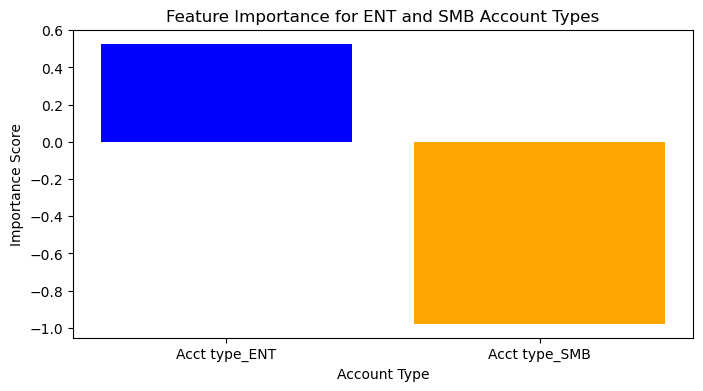

In [131]:
import matplotlib.pyplot as plt

# Feature names and their corresponding importance scores for ENT and SMB
features = ['Acct type_ENT', 'Acct type_SMB']
importance_scores = [0.52774, -0.97819]

# Create a bar chart
plt.figure(figsize=(8, 4))
plt.bar(features, importance_scores, color=['blue', 'orange'])

# Add title and labels
plt.title('Feature Importance for ENT and SMB Account Types')
plt.xlabel('Account Type')
plt.ylabel('Importance Score')

# Display the bar chart
plt.show()




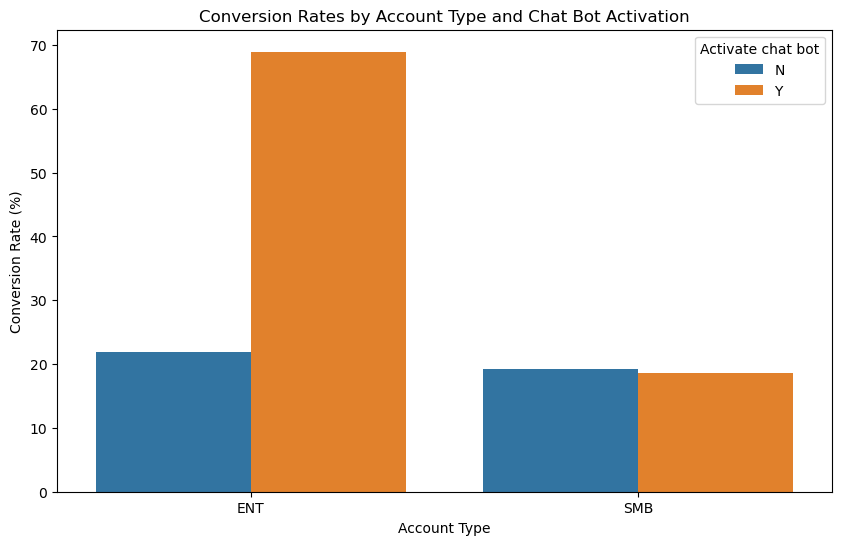

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'account_attributes' is a DataFrame containing the relevant data
# Calculate conversion rates
conversion_rates = account_attributes.groupby(['Acct type', 'Activate chat bot'])['Converted to paid customer'].mean() * 100

# Reset index to use in seaborn barplot
conversion_rates = conversion_rates.reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Acct type', y='Converted to paid customer', hue='Activate chat bot', data=conversion_rates)
plt.title('Conversion Rates by Account Type and Chat Bot Activation')
plt.xlabel('Account Type')
plt.ylabel('Conversion Rate (%)')
plt.show()


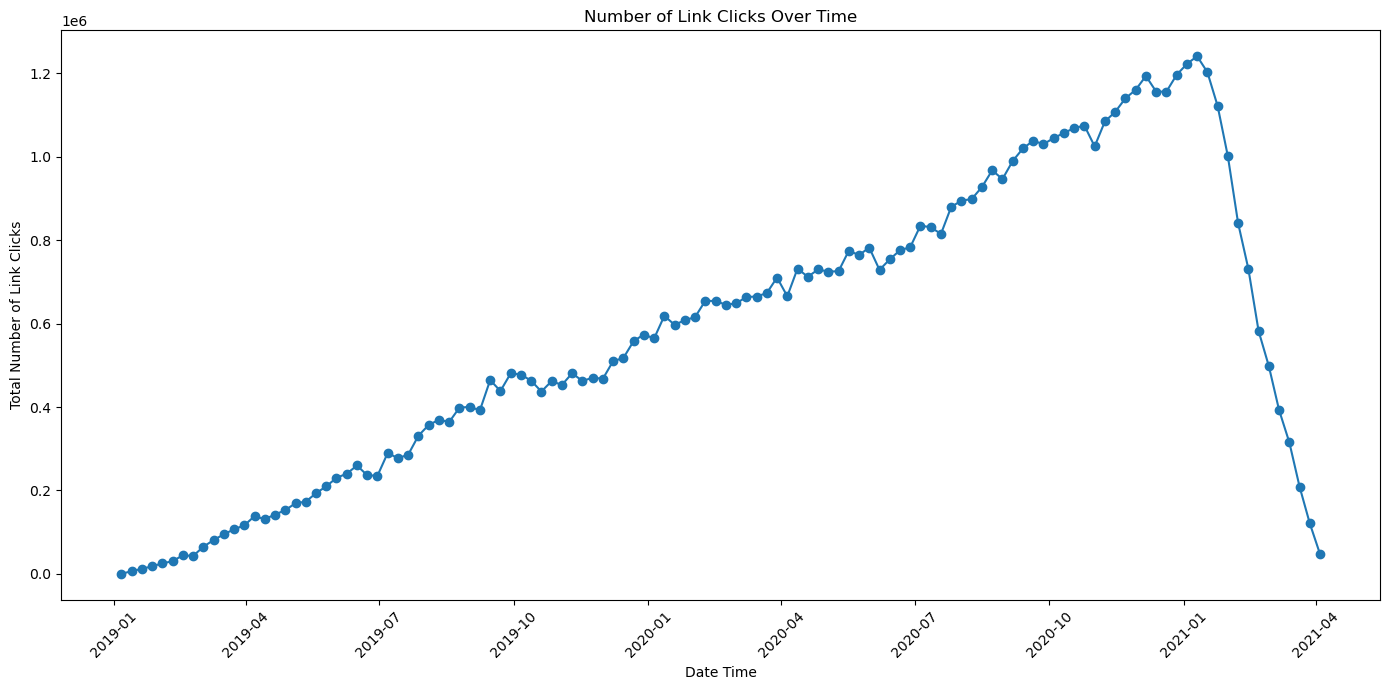

In [133]:
# Assuming 'account_usage' is a DataFrame containing the relevant data
# Convert 'Date time' to datetime if not already done
account_usage['Date time'] = pd.to_datetime(account_usage['Date time'])

# Aggregate the total number of link clicks over time
time_series_data = account_usage.groupby('Date time')['Number of link clicks'].sum().reset_index()

# Create a time series plot
plt.figure(figsize=(14, 7))
plt.plot(time_series_data['Date time'], time_series_data['Number of link clicks'], marker='o')
plt.title('Number of Link Clicks Over Time')
plt.xlabel('Date Time')
plt.ylabel('Total Number of Link Clicks')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
